In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
resultados = pd.read_excel('resultados.xlsx')
classificacao = pd.read_excel('../codigos/resultados/2019/classes.xlsx')

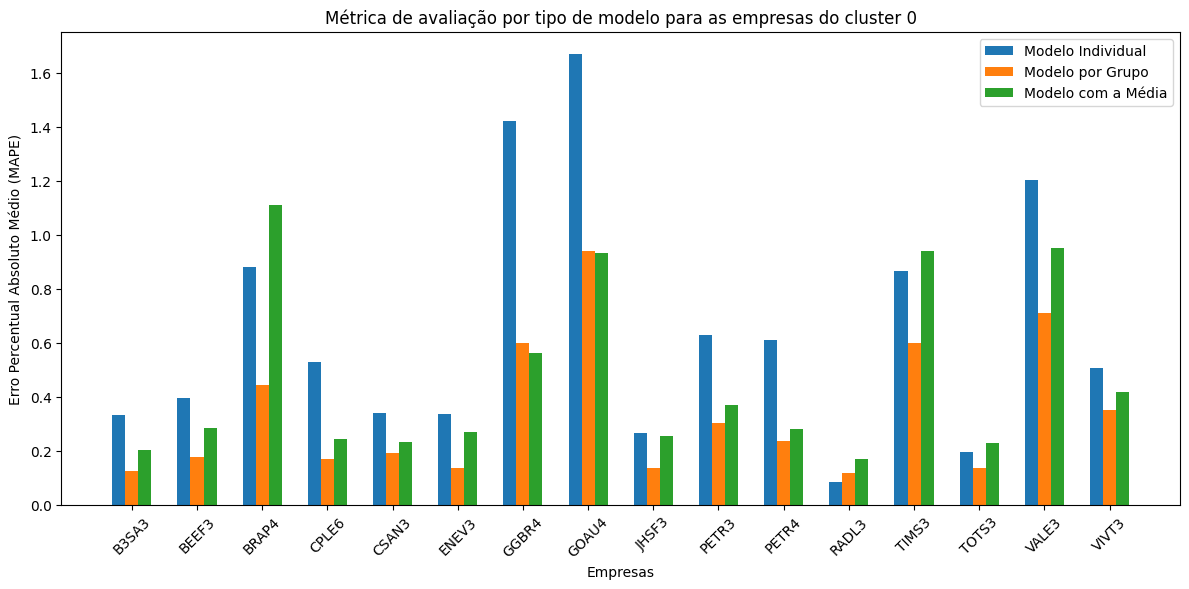

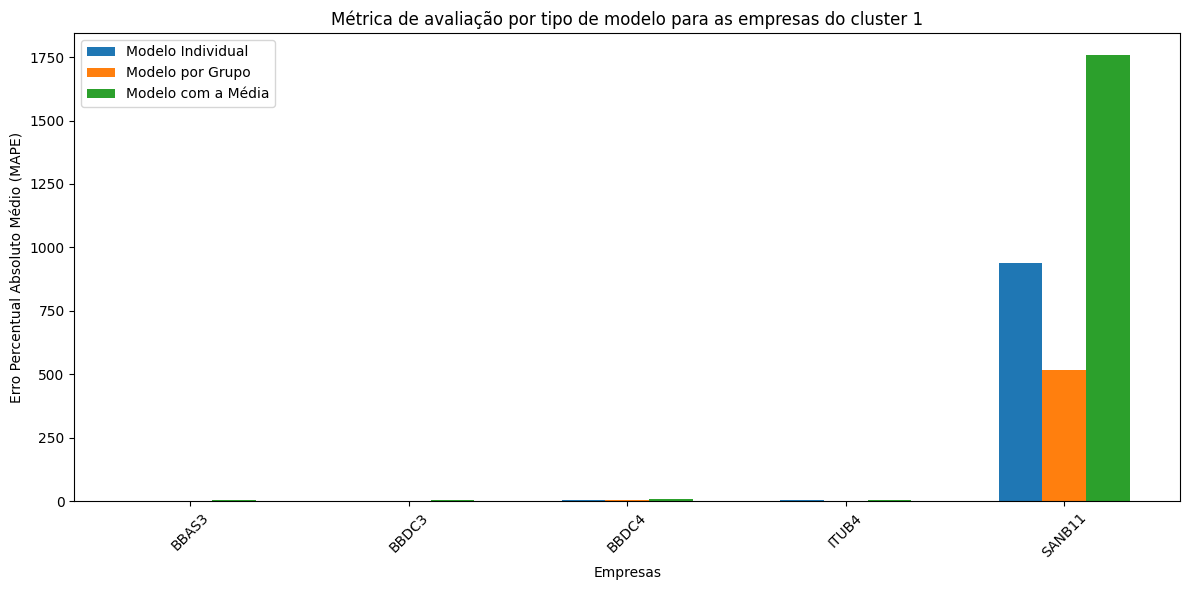

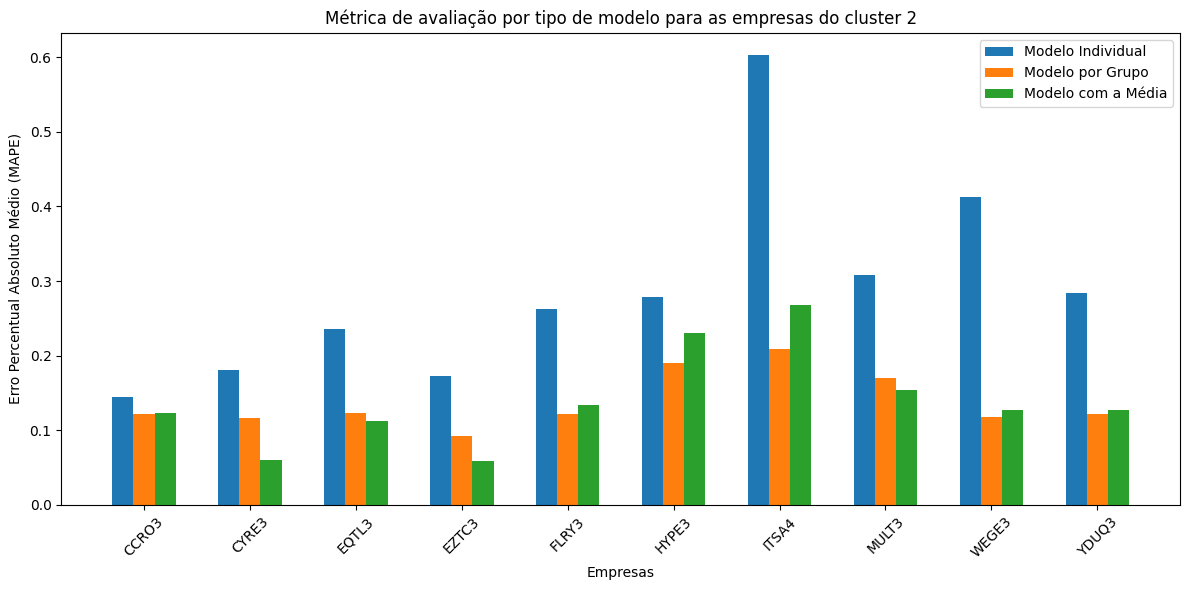

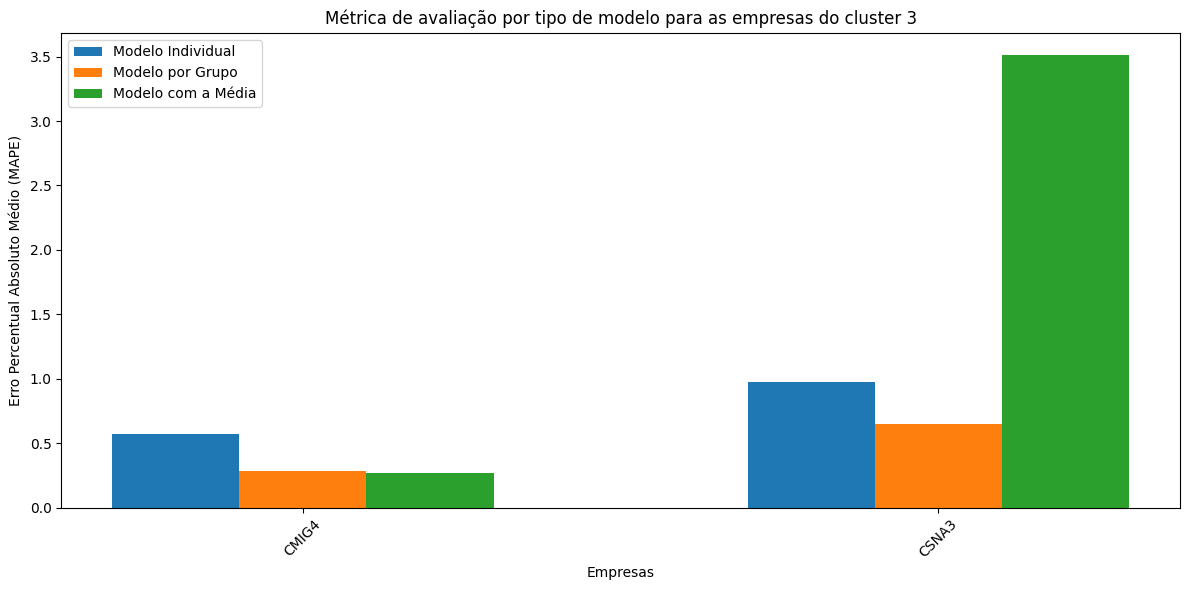

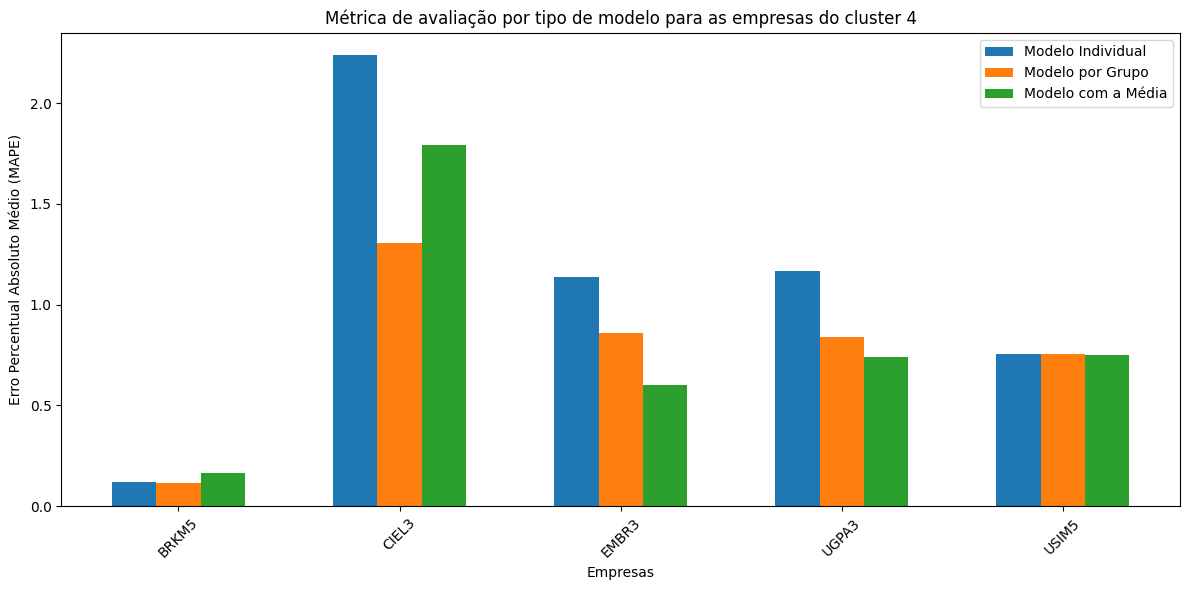

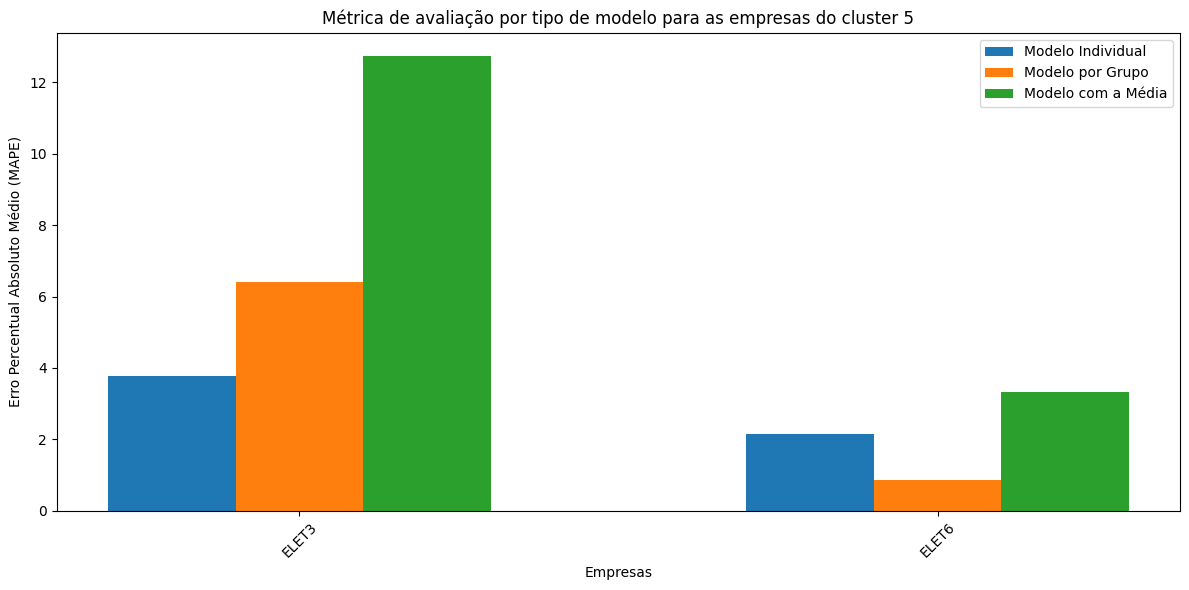

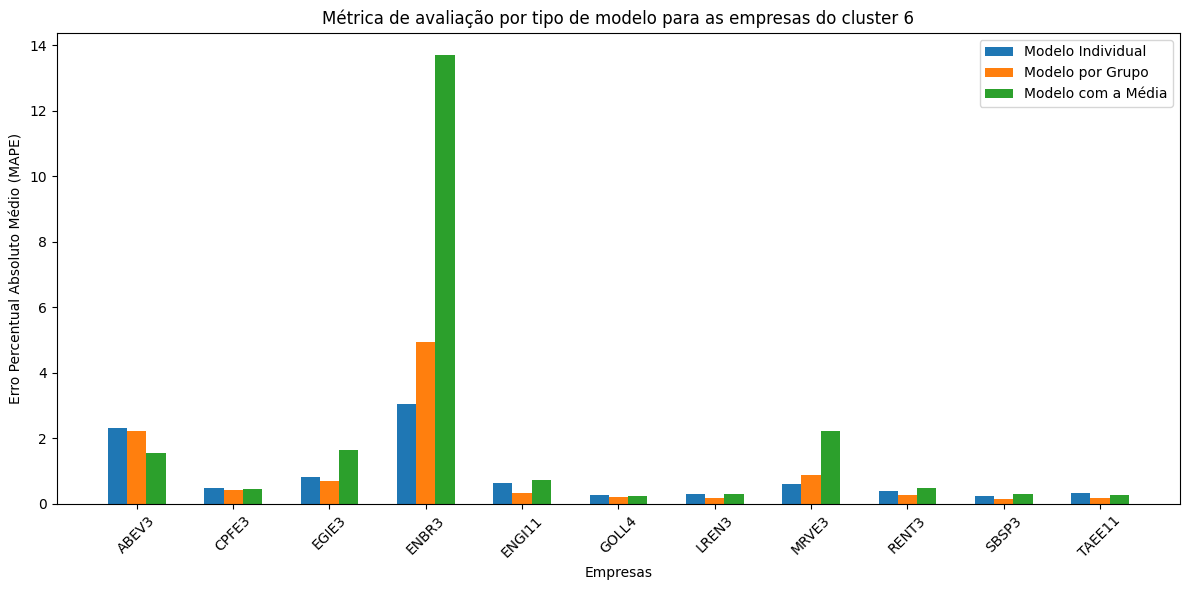

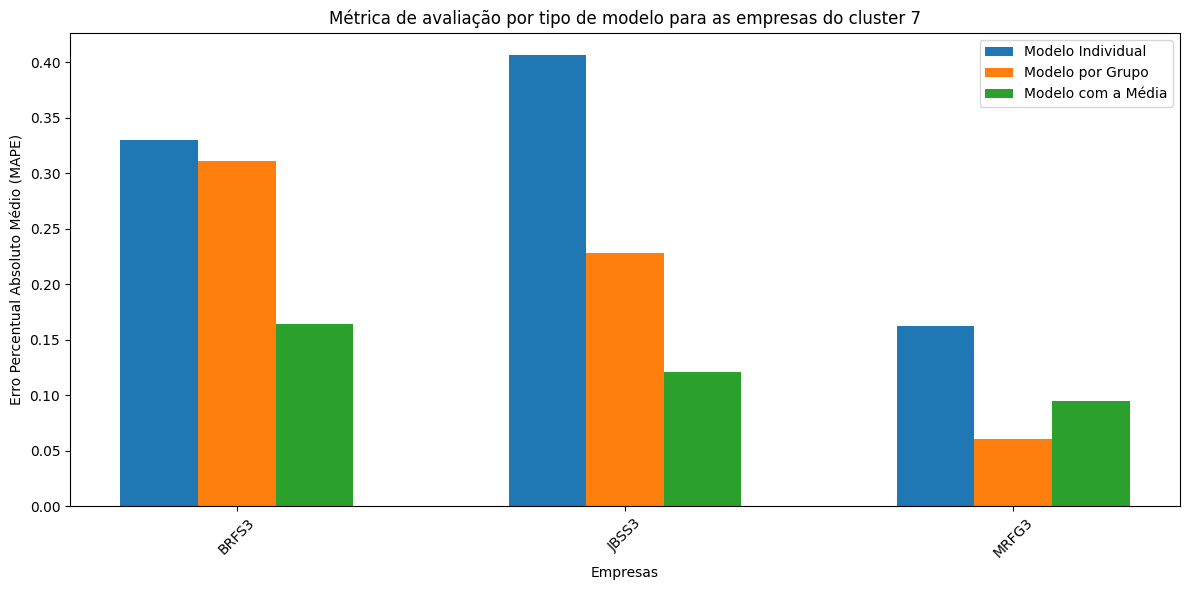

In [30]:
# Definindo as posições das barras no eixo x

clusters = [0,1,2,3,4,5,6,7]

for cluster in clusters:

  # Largura das barras
  largura_barra = 0.2

  classe = classificacao.query('classes==' + str(cluster))
  ativos = list(classe['ativos'])
  resultadosClasses = resultados.query("ativos==" + str(ativos))
  resultadosClasses.set_index('ativos', inplace=True)


  modeloInd = resultadosClasses['Modelo Individual Teste']
  modeloGrupo = resultadosClasses['Modelo por grupos Teste']
  modeloMedia = resultadosClasses['Modelo com a Média Teste']

  x = np.arange(len(modeloInd))

  # Criando o gráfico
  plt.figure(figsize=(12, 6))

  plt.bar(x,                     modeloInd, width=largura_barra, label='Modelo Individual')
  plt.bar(x + largura_barra,     modeloGrupo, width=largura_barra, label='Modelo por Grupo')
  plt.bar(x + 2 * largura_barra, modeloMedia, width=largura_barra, label='Modelo com a Média')

  # Configurando o eixo x
  plt.xticks(x + largura_barra, ativos, rotation=45)

  # Configurando o gráfico
  plt.xlabel('Empresas')
  plt.ylabel('Erro Percentual Absoluto Médio (MAPE)')
  plt.title('Métrica de avaliação por tipo de modelo para as empresas do cluster ' + str(cluster))
  plt.legend()

  # Mostrando o gráfico
  plt.tight_layout()
  plt.savefig('./resultados/cluster_' + str(cluster) + '.png')
  # plt.show()